In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
product_descriptions = pd.read_csv('..C:/Users/91981/Desktop/grid/product_descriptions.csv.zip/product_descriptions.csv')
product_descriptions.shape

NameError: name 'pd' is not defined

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD


In [9]:


product_descriptions = pd.read_csv('C:/Users/91981/Desktop/grid/product_descriptions.csv')
print(product_descriptions.shape)


(124428, 2)


In [10]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [11]:
product_descriptions1 = product_descriptions.head(500)

In [12]:
product_descriptions1["product_description"].head(10)


0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

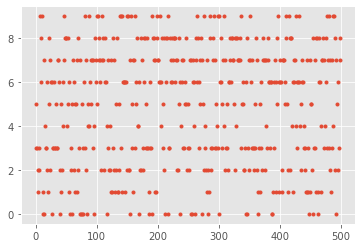

In [14]:

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [15]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [16]:

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 volt
 power
 battery
 lithium
 m12
 impact
 ion
 tool
 amp
 free
Cluster 1:
 cutting
 easy
 steel
 features
 blade
 aluminum
 saw
 tool
 design
 lightweight
Cluster 2:
 water
 air
 easy
 heater
 tank
 control
 gas
 helps
 year
 installation
Cluster 3:
 metal
 steel
 screw
 gauge
 20
 screws
 pre
 drill
 hole
 work
Cluster 4:
 window
 natural
 bamboo
 insulation
 mount
 wood
 shades
 size
 privacy
 vinyl
Cluster 5:
 storage
 shelves
 drawer
 room
 shelf
 adjustable
 lbs
 unit
 easy
 solid
Cluster 6:
 wall
 panels
 proposition
 nbsp
 residents
 california
 65
 wood
 painted
 ft
Cluster 7:
 light
 watt
 bulb
 led
 lighting
 bulbs
 fan
 fixture
 depot
 white
Cluster 8:
 concrete
 ft
 paint
 water
 seal
 provides
 rust
 stake
 use
 frame
Cluster 9:
 piece
 tile
 natural
 recommended
 outdoor
 stone
 brick
 ft
 use
 finish


C:\Users\91981\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])
    

In [18]:
show_recommendations("cutting tool")

Cluster 1:
 cutting
 easy
 steel
 features
 blade
 aluminum
 saw
 tool
 design
 lightweight


In [19]:
show_recommendations("paint")

Cluster 8:
 concrete
 ft
 paint
 water
 seal
 provides
 rust
 stake
 use
 frame


In [20]:
show_recommendations("water gun")

Cluster 2:
 water
 air
 easy
 heater
 tank
 control
 gas
 helps
 year
 installation
